# Analisis de los decretos y las resoluciones publicadas por el Ministerio de Salud en el lapso de 2000-2020

<p style='text-align: justify;'>  En el análisis que se va a realizar, se tiene en cuenta exclusivamente los decretos y resoluciones publicados por el Ministerio de Salud debido a que dichos documentos son los actos que implementan los entes de control para actuar en forma inmediata o en corto tiempo para dar respuesta a alguna situación critica a nivel nacional en terminos de Salud publica. A Continuación la definición de cada documento: </p> 

1. <p style='text-align: justify;'> Según el archivo nacional de la nación, un Decreto es un acto administrativo promulgado por el poder ejecutivo con contenido normativo reglamentario sin necesidad de ser sometida al órgano legislativo. Cuando se habla de un decreto ley se trata de un acto que ofrece la posibilidad de tener aplicación con fuerza de ley sin que necesite la intervención del congreso, generalmente se da cuando existen necesidades que deben ser ejecutadas con urgencia.</p> 

Defición en el link siguiente:https://normativa.archivogeneral.gov.co/inicio/decretos/ 

2.  <p style='text-align: justify;'>  Según el arhivo nacional de la nación, una Resolución es un acto procesal emanado por un tribunal, mediante el cual se resuelve una controversia originada entre las partes, así mismo puede autorizar u ordenar el cumplimiento de medidas específicas.</p> 

Defición en el link siguiente:https://normativa.archivogeneral.gov.co/inicio/resoluciones/

In [1]:
import os
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from tika import parser
import PyPDF3
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = [15.0, 8.0]

A continuación se llaman bases de datos de cobertura y datos macro relacionados al sector salud en Colombia. 
Los datos fueron sacados de :
1. Los indicaroes Macro sobre gasto en salud y número de medicos y enfermeras por cada 1000 habitates fue sacado del banco Mundial: https://datos.bancomundial.org/pais/colombia
2. Los datos sobre cobertura en Colombia son sacados del Ministerio de Salud: https://www.minsalud.gov.co/proteccionsocial/Regimensubsidiado/Paginas/coberturas-del-regimen-subsidiado.aspx

In [2]:
gasto=pd.read_excel("variables_salud.xlsx")
gasto['FECHA']=gasto['FECHA'].astype(str)
gasto=gasto.set_index('FECHA')

In [3]:
gasto.dtypes

%salud/pib                                 float64
per capita US                              float64
% G.pri salud del Gasto Total en Salud)    float64
Gasto publico S/gasto total                float64
medico/1000                                float64
enfermeros/1000                            float64
dtype: object

In [4]:
var_cobert=pd.read_excel("cobertura_salud.xlsx")

In [5]:
texto_decretos=pd.read_excel("C:/Users/LENOVO/Desktop/proyecto/decretos/textos_decretos.xlsx")

In [6]:
texto_decretos=texto_decretos.drop(columns=('Unnamed: 0'))

In [7]:
texto_decretos['tipo_archivo']='decretos'

In [8]:
texto_decretos.head()

,link,nombre,años,textos1,numero_palabras1,tipo_archivo
0,https://www.minsalud.gov.co/Normatividad_Nuevo...,Decreto_600_de_2020.pdf,2020,['Revisó _-:..;; PRESIDENCIA DE LA REPÚBLICA R...,7221,decretos
1,https://www.minsalud.gov.co/Normatividad_Nuevo...,Decreto_539_de_2020.pdf,2020,"['· , REPÚBLICA DE COLOMBIA MINISTERIO DE SALU...",29392,decretos
2,https://www.minsalud.gov.co/Normatividad_Nuevo...,Decreto_538_de_2020.pdf,2020,"['F""""""\'--_~I~l(___........_ ~: . 1. • 1 , PRE...",77140,decretos
3,https://www.minsalud.gov.co/Normatividad_Nuevo...,Decreto_521_de_2020.pdf,2020,"['f..~~I:f\'J i,~~.m.,~~. ~ PRESIDENCIA O~ LA ...",60011,decretos
4,https://www.minsalud.gov.co/Normatividad_Nuevo...,Decreto_491_de_2020.pdf,2020,['\\.. ~EÑcÍADEü\\REPÚBí.ICA REPÚBLICA DE COLO...,55090,decretos


In [9]:
texto_decretos.shape

(558, 6)

In [10]:
texto_resoluciones=pd.read_excel("C:/Users/LENOVO/Desktop/proyecto/resoluciones/Textos_resoluciones.xlsx")

In [11]:
texto_resoluciones=texto_resoluciones.drop(columns=('Unnamed: 0'))

In [12]:
texto_resoluciones['tipo_archivo']='resoluciones'

In [13]:
texto_resoluciones.head()

,links,nombre,años,textos,numero_palabras,textos1,numero_palabras1,tipo_archivo
0,https://www.minsalud.gov.co/Normatividad_Nuevo...,Resoluci%C3%B3n_No._719_de_2020.pdf,2020,['719 Modifica la resolucion 085 de 2020 - des...,114,['ÿþ719 Modifica la resolucion 085 de 2020 - d...,14573,resoluciones
1,https://www.minsalud.gov.co/Normatividad_Nuevo...,Resoluci%C3%B3n_No._718_de_2020.pdf,2020,['718 Modifica la resolucion 085 de 2020 - des...,120,['ÿþ718 Modifica la resolucion 085 de 2020 - d...,8168,resoluciones
2,https://www.minsalud.gov.co/Normatividad_Nuevo...,Resoluci%C3%B3n_No._714_de_2020.pdf,2020,['714 Adopta Protocolo de bioseguridad desarr...,76,['ÿþ714 Adopta Protocolo de bioseguridad desa...,18564,resoluciones
3,https://www.minsalud.gov.co/Normatividad_Nuevo...,Resoluci%C3%B3n_No._686_de_2020.pdf,2020,['686 Modifica anexos técnicos 1 y 2 de la Res...,65,['ÿþ686 Modifica anexos técnicos 1 y 2 de la R...,21893,resoluciones
4,https://www.minsalud.gov.co/Normatividad_Nuevo...,Resoluci%C3%B3n_No.680_de_2020.pdf,2020,['680 Protocolo de bioseguridad Agua Potable y...,62,['ÿþ680 Protocolo de bioseguridad Agua Potable...,122522,resoluciones


In [14]:
texto_resoluciones.shape

(1406, 8)

El siguiente código consolida los textos de los scrappings de los decretos y resoluciones publicadas por el Ministerio de Salud.

In [15]:
texto_total=texto_decretos.append(texto_resoluciones)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [16]:
texto_total.shape

(1964, 9)

In [17]:
texto_total['textos']=texto_total['textos1']+' '
texto_total['años']=texto_total['años'].astype(str)

Este código consolida los textos por año y tipo de archivo.

In [18]:
bla=texto_total.groupby(['años', "tipo_archivo"], sort=True)
counts = bla.size().to_frame(name='counts')
base_años_cate=(counts
  .join(bla.agg({'textos': 'sum'}))  
  .reset_index())

Este código consolida los textos solo por año.

In [19]:
bla=texto_total.groupby(['años'], sort=True)
counts = bla.size().to_frame(name='counts')
base_años_total=(counts
  .join(bla.agg({'textos': 'sum'}))  
  .reset_index())

# Limpieza de textos

In [20]:
punctuacion = string.punctuation + '–¡¿”“•\r´'
punctuacion

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [21]:
def no_punct(string):
    transtable = string.maketrans('', '', punctuacion)
    return string.translate(transtable)

In [22]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += ele     
    return str1 

In [23]:
base_años_total['textos']=base_años_total['textos'].apply(listToString)

In [24]:
base_años_total['no_punct'] = base_años_total['textos'].apply(no_punct)

In [25]:
base_años_total['no_punct'] = base_años_total['no_punct'].apply(str.lower)

In [26]:
base_años_total['no_punct']=base_años_total[u'no_punct'].map(lambda x:x.replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u").replace("ü", "u") )

In [27]:
base_años_total.head()

,años,counts,textos,no_punct
0,2000,56,['Decreto 2694 de 2000DECRETO NUMERO 2694 DE 2...,decreto 2694 de 2000decreto numero 2694 de 200...
1,2001,26,['Decreto 222 de 2000 MINISTERIO DE HACIENDA...,decreto 222 de 2000 ministerio de hacienda y...
2,2002,53,['Documento1Decreto 2340 de 2001 Diario Ofici...,documento1decreto 2340 de 2001 diario oficial...
3,2003,74,['Por la cual se adopta un formulario de info...,por la cual se adopta un formulario de inform...
4,2004,107,['ResoluciónHoja 1 de 9 MINISTERIO DE LA P...,resolucionhoja 1 de 9 ministerio de la pro...


In [28]:
lista_salud=['ministerio','asi',"resolucion", 'salud', 'presidencia', 'republica','colombia', 'decreto', 'republlca', 'oficial', 'ley', 'ministro', 'articulo', 'nacional','paragrafo', 'superintendencia', 'dane','hoja','numero', 'anexo', 'bogota', 'dc' , 'si', 'misma', 'disposicione', 'proteccion','social','mismo', 'caso', 'dictan', 'disposicionen']

In [29]:
base_años_total['lista_textos'] = base_años_total['no_punct'].apply(word_tokenize)

In [30]:
stopwords_esp = stopwords.words('spanish')+(lista_salud)

In [31]:
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [32]:
base_años_total['no_stopwords'] = base_años_total['lista_textos'].apply(no_stopwords)

In [33]:
base_años_total.head()

,años,counts,textos,no_punct,lista_textos,no_stopwords
0,2000,56,['Decreto 2694 de 2000DECRETO NUMERO 2694 DE 2...,decreto 2694 de 2000decreto numero 2694 de 200...,"[decreto, 2694, de, 2000decreto, numero, 2694,...","[2694, 2000decreto, 2694, 2000, diciembre, 26,..."
1,2001,26,['Decreto 222 de 2000 MINISTERIO DE HACIENDA...,decreto 222 de 2000 ministerio de hacienda y...,"[decreto, 222, de, 2000, ministerio, de, hacie...","[222, 2000, hacienda, credito, publico, 222, 2..."
2,2002,53,['Documento1Decreto 2340 de 2001 Diario Ofici...,documento1decreto 2340 de 2001 diario oficial...,"[documento1decreto, 2340, de, 2001, diario, of...","[documento1decreto, 2340, 2001, diario, 44602,..."
3,2003,74,['Por la cual se adopta un formulario de info...,por la cual se adopta un formulario de inform...,"[por, la, cual, se, adopta, un, formulario, de...","[adopta, formulario, informacion, relacionado,..."
4,2004,107,['ResoluciónHoja 1 de 9 MINISTERIO DE LA P...,resolucionhoja 1 de 9 ministerio de la pro...,"[resolucionhoja, 1, de, 9, ministerio, de, la,...","[resolucionhoja, 1, 9, 0515, 2004, febrero, 20..."


In [34]:
base_años_total['palabras']=base_años_total['no_stopwords'].map(lambda x:len(x))

In [35]:
base_años_total['texto_tokes'] = base_años_total['no_stopwords'].apply(nltk.Text)

In [36]:
x_de=list(base_años_cate[base_años_cate['tipo_archivo']=='decretos']['counts'])
x_res=list(base_años_cate[base_años_cate['tipo_archivo']=='resoluciones']['counts'])

In [37]:
y=sorted(list(set(base_años_cate['años'])))

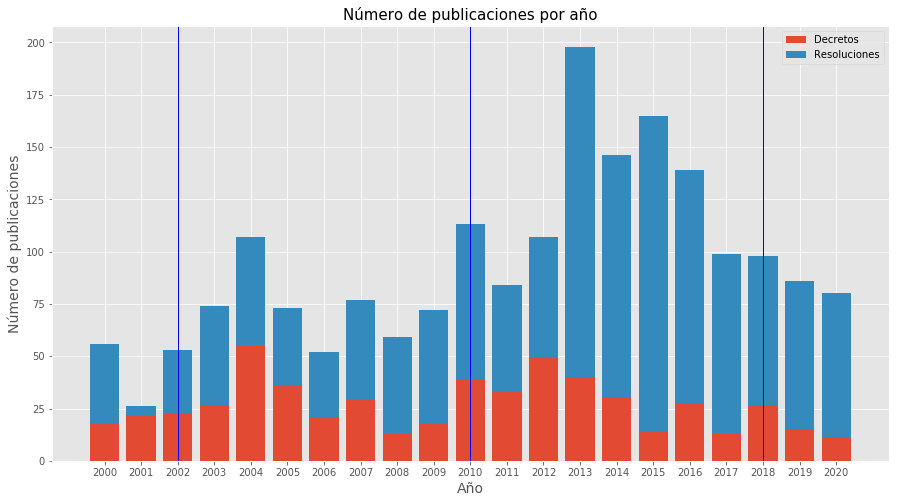

In [38]:
fig, ax = plt.subplots()
ax.bar(y, x_de, label='Decretos')#
ax.bar(y, x_res, bottom=x_de,label='Resoluciones')
ax.axvline(x=2, linewidth=1, color='b');
ax.axvline(x=10, linewidth=1, color='b');
ax.axvline(x=18, linewidth=1, color='b');
ax.set_title("Número de publicaciones por año", fontdict={'fontsize': 15})
ax.set_ylabel("Número de publicaciones", fontdict={'fontsize': 14})
ax.set_xlabel("Año", fontdict={'fontsize': 14});


plt.legend();
plt.savefig('publicaciones_año.png')

In [39]:
base_años_total.head()

,años,counts,textos,no_punct,lista_textos,no_stopwords,palabras,texto_tokes
0,2000,56,['Decreto 2694 de 2000DECRETO NUMERO 2694 DE 2...,decreto 2694 de 2000decreto numero 2694 de 200...,"[decreto, 2694, de, 2000decreto, numero, 2694,...","[2694, 2000decreto, 2694, 2000, diciembre, 26,...",62340,"(2694, 2000decreto, 2694, 2000, diciembre, 26,..."
1,2001,26,['Decreto 222 de 2000 MINISTERIO DE HACIENDA...,decreto 222 de 2000 ministerio de hacienda y...,"[decreto, 222, de, 2000, ministerio, de, hacie...","[222, 2000, hacienda, credito, publico, 222, 2...",19327,"(222, 2000, hacienda, credito, publico, 222, 2..."
2,2002,53,['Documento1Decreto 2340 de 2001 Diario Ofici...,documento1decreto 2340 de 2001 diario oficial...,"[documento1decreto, 2340, de, 2001, diario, of...","[documento1decreto, 2340, 2001, diario, 44602,...",44718,"(documento1decreto, 2340, 2001, diario, 44602,..."
3,2003,74,['Por la cual se adopta un formulario de info...,por la cual se adopta un formulario de inform...,"[por, la, cual, se, adopta, un, formulario, de...","[adopta, formulario, informacion, relacionado,...",57257,"(adopta, formulario, informacion, relacionado,..."
4,2004,107,['ResoluciónHoja 1 de 9 MINISTERIO DE LA P...,resolucionhoja 1 de 9 ministerio de la pro...,"[resolucionhoja, 1, de, 9, ministerio, de, la,...","[resolucionhoja, 1, 9, 0515, 2004, febrero, 20...",92362,"(resolucionhoja, 1, 9, 0515, 2004, febrero, 20..."


A continuación se crean 4 categorías a analizar con base a los textos prensentes en los decretos y las resoluciones del Ministerio de Salud.

In [40]:
#tematicas
epidemias=['epidemias','niña','pandemia','pandemias','ah1n1','covid','coronavirus','alerta','alertas','amenaza','amenazas',
           'contingente','contingentes','contingencia','contingencias','ebola','influenza','virus','urgencia','emergencia', 
           'varicela', 'malaria', 'dengue','epidemiologico','epidemiologica', 'brote', 'brotes','h1n1',
           'fenomeno', 'crisis', 'chikungunya', 'sika']

cobertura=['cobertura','coberturas','preparacion', 'preparaciones','preparatoria','planificacion','organizacion',
           'vulnerabilidad','vulnerables','monitoreo','atencion','eps','ips','seguro','accesibilidad','aseguradores','domiciliaria',
           'equipamientos', 'esterilización','accesible','integral','promotoras','afiliado',
           'telesalud', 'telemedicina','sisben','sispro','supercade', 'proveedor','fosyga',
          'mejoramiento', 'subsidiado', 'subsidio' ,'contributivo', 'excepcion','hospitales','pensionado',
           'pensionados', 'recuperacion','discapacidad','discapacitados','apoyo','coordinacion', 'articulacion',
           'provision','prevenir', 'garantizar','garantice','pos']

intervencion=['investigacion','liquidacion','prohibiciones','incumplimiento','prevencion',
              'prestadores','reparacion', 'recobro', 'necesidades','intervencion', 'medidas', 'interventor',
              'cartera', 'inspeccion','auditoria','evaluacion','deudas','prorroga','cumple','deficit','investigado']

fraude=['fraude','fraudes','corrupcion', 'delito','delitos','demandas','demanda','denuncia', 'denuncias',
'peticiones','tutela','tutelas','desacato','desacatos','queja','quejas', 'reclamo','reclamos']

<p style='text-align: justify;'>   Con el código siguiente, se consolida la información de cada categoría en una sola base con el fin de graficar los datos y tener una estendarización de bases. Esto anterior con ayuda de la librería "sklearn", usando "CountVectorizer" se cuneta el numero de veces que aparece cada palabra por año y al final agrupamos dichas palaras en cada categoria para asi detener solo 4 variables consolidadas que reunen toda la información relacionada a cada tematica.</p> 

In [41]:

cv = CountVectorizer(vocabulary=epidemias)
data_cv = cv.fit_transform(base_años_total['no_punct'])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = base_años_total['años']
data_epid = data_stop.transpose().reset_index()
data_epid['tema']='epidemias'

In [42]:
cv = CountVectorizer(vocabulary=cobertura)
data_cv = cv.fit_transform(base_años_total['no_punct'])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = base_años_total['años']
data_cover = data_stop.transpose().reset_index()
data_cover['tema']='cobertura'

In [43]:
cv = CountVectorizer(vocabulary=intervencion)
data_cv = cv.fit_transform(base_años_total['no_punct'])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = base_años_total['años']
data_inter = data_stop.transpose().reset_index()
data_inter['tema']='intervencion'

In [44]:
cv = CountVectorizer(vocabulary=fraude)
data_cv = cv.fit_transform(base_años_total['no_punct'])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = base_años_total['años']
data_legal = data_stop.transpose().reset_index()
data_legal['tema']='fraude'

In [45]:
    bla=data_epid.groupby(['tema'], sort=True)
    counts = bla.size().to_frame(name='counts')
    data_epid_total=(counts
      .join(bla.agg({'2000': 'sum'}))
      .join(bla.agg({'2001': 'sum'}))   
      .join(bla.agg({'2002': 'sum'}))
      .join(bla.agg({'2003': 'sum'}))
      .join(bla.agg({'2004': 'sum'}))
      .join(bla.agg({'2005': 'sum'}))  
      .join(bla.agg({'2006': 'sum'}))
      .join(bla.agg({'2007': 'sum'}))                 
      .join(bla.agg({'2008': 'sum'}))
      .join(bla.agg({'2009': 'sum'}))                  
      .join(bla.agg({'2010': 'sum'}))
      .join(bla.agg({'2011': 'sum'}))                  
      .join(bla.agg({'2012': 'sum'}))
      .join(bla.agg({'2013': 'sum'}))
      .join(bla.agg({'2014': 'sum'}))                  
      .join(bla.agg({'2015': 'sum'}))
      .join(bla.agg({'2016': 'sum'})) 
      .join(bla.agg({'2017': 'sum'}))                  
      .join(bla.agg({'2018': 'sum'}))
      .join(bla.agg({'2019': 'sum'}))                   
      .join(bla.agg({'2020': 'sum'}))                 
                      .reset_index())

In [46]:
    bla=data_cover.groupby(['tema'], sort=True)
    counts = bla.size().to_frame(name='counts')
    data_cover_total=(counts
      .join(bla.agg({'2000': 'sum'}))
      .join(bla.agg({'2001': 'sum'}))   
      .join(bla.agg({'2002': 'sum'}))
      .join(bla.agg({'2003': 'sum'}))
      .join(bla.agg({'2004': 'sum'}))
      .join(bla.agg({'2005': 'sum'}))  
      .join(bla.agg({'2006': 'sum'}))
      .join(bla.agg({'2007': 'sum'}))                 
      .join(bla.agg({'2008': 'sum'}))
      .join(bla.agg({'2009': 'sum'}))                  
      .join(bla.agg({'2010': 'sum'}))
      .join(bla.agg({'2011': 'sum'}))                  
      .join(bla.agg({'2012': 'sum'}))
      .join(bla.agg({'2013': 'sum'}))
      .join(bla.agg({'2014': 'sum'}))                  
      .join(bla.agg({'2015': 'sum'}))
      .join(bla.agg({'2016': 'sum'})) 
      .join(bla.agg({'2017': 'sum'}))                  
      .join(bla.agg({'2018': 'sum'}))
      .join(bla.agg({'2019': 'sum'}))                   
      .join(bla.agg({'2020': 'sum'}))                 
                      .reset_index())

In [47]:
    bla=data_inter.groupby(['tema'], sort=True)
    counts = bla.size().to_frame(name='counts')
    data_inter_total=(counts
      .join(bla.agg({'2000': 'sum'}))
      .join(bla.agg({'2001': 'sum'}))   
      .join(bla.agg({'2002': 'sum'}))
      .join(bla.agg({'2003': 'sum'}))
      .join(bla.agg({'2004': 'sum'}))
      .join(bla.agg({'2005': 'sum'}))  
      .join(bla.agg({'2006': 'sum'}))
      .join(bla.agg({'2007': 'sum'}))                 
      .join(bla.agg({'2008': 'sum'}))
      .join(bla.agg({'2009': 'sum'}))                  
      .join(bla.agg({'2010': 'sum'}))
      .join(bla.agg({'2011': 'sum'}))                  
      .join(bla.agg({'2012': 'sum'}))
      .join(bla.agg({'2013': 'sum'}))
      .join(bla.agg({'2014': 'sum'}))                  
      .join(bla.agg({'2015': 'sum'}))
      .join(bla.agg({'2016': 'sum'})) 
      .join(bla.agg({'2017': 'sum'}))                  
      .join(bla.agg({'2018': 'sum'}))
      .join(bla.agg({'2019': 'sum'}))                   
      .join(bla.agg({'2020': 'sum'}))                 
                      .reset_index())

In [48]:
    bla=data_legal.groupby(['tema'], sort=True)
    counts = bla.size().to_frame(name='counts')
    data_legal_total=(counts
      .join(bla.agg({'2000': 'sum'}))
      .join(bla.agg({'2001': 'sum'}))   
      .join(bla.agg({'2002': 'sum'}))
      .join(bla.agg({'2003': 'sum'}))
      .join(bla.agg({'2004': 'sum'}))
      .join(bla.agg({'2005': 'sum'}))  
      .join(bla.agg({'2006': 'sum'}))
      .join(bla.agg({'2007': 'sum'}))                 
      .join(bla.agg({'2008': 'sum'}))
      .join(bla.agg({'2009': 'sum'}))                  
      .join(bla.agg({'2010': 'sum'}))
      .join(bla.agg({'2011': 'sum'}))                  
      .join(bla.agg({'2012': 'sum'}))
      .join(bla.agg({'2013': 'sum'}))
      .join(bla.agg({'2014': 'sum'}))                  
      .join(bla.agg({'2015': 'sum'}))
      .join(bla.agg({'2016': 'sum'})) 
      .join(bla.agg({'2017': 'sum'}))                  
      .join(bla.agg({'2018': 'sum'}))
      .join(bla.agg({'2019': 'sum'}))                   
      .join(bla.agg({'2020': 'sum'}))                 
                      .reset_index())

In [49]:
consolidado=data_epid_total.append([data_cover_total,data_inter_total,data_legal_total]).transpose()
consolidado.columns = ['epidemias','cobertura','intervencion','fraude']
consolidado=consolidado.drop(['counts','tema'], axis=0)

In [50]:
base_años_total

,años,counts,textos,no_punct,lista_textos,no_stopwords,palabras,texto_tokes
0,2000,56,['Decreto 2694 de 2000DECRETO NUMERO 2694 DE 2...,decreto 2694 de 2000decreto numero 2694 de 200...,"[decreto, 2694, de, 2000decreto, numero, 2694,...","[2694, 2000decreto, 2694, 2000, diciembre, 26,...",62340,"(2694, 2000decreto, 2694, 2000, diciembre, 26,..."
1,2001,26,['Decreto 222 de 2000 MINISTERIO DE HACIENDA...,decreto 222 de 2000 ministerio de hacienda y...,"[decreto, 222, de, 2000, ministerio, de, hacie...","[222, 2000, hacienda, credito, publico, 222, 2...",19327,"(222, 2000, hacienda, credito, publico, 222, 2..."
2,2002,53,['Documento1Decreto 2340 de 2001 Diario Ofici...,documento1decreto 2340 de 2001 diario oficial...,"[documento1decreto, 2340, de, 2001, diario, of...","[documento1decreto, 2340, 2001, diario, 44602,...",44718,"(documento1decreto, 2340, 2001, diario, 44602,..."
3,2003,74,['Por la cual se adopta un formulario de info...,por la cual se adopta un formulario de inform...,"[por, la, cual, se, adopta, un, formulario, de...","[adopta, formulario, informacion, relacionado,...",57257,"(adopta, formulario, informacion, relacionado,..."
4,2004,107,['ResoluciónHoja 1 de 9 MINISTERIO DE LA P...,resolucionhoja 1 de 9 ministerio de la pro...,"[resolucionhoja, 1, de, 9, ministerio, de, la,...","[resolucionhoja, 1, 9, 0515, 2004, febrero, 20...",92362,"(resolucionhoja, 1, 9, 0515, 2004, febrero, 20..."
5,2005,73,['Decreto2.dotHoja 1 de 2 MINISTERIO DE L...,decreto2dothoja 1 de 2 ministerio de la p...,"[decreto2dothoja, 1, de, 2, ministerio, de, la...","[decreto2dothoja, 1, 2, 0148, 2005, enero, 26,...",87435,"(decreto2dothoja, 1, 2, 0148, 2005, enero, 26,..."
6,2006,52,['DECRETO NÚMERO 3535 DE 2005.docHoja 1 de 1 ...,decreto numero 3535 de 2005dochoja 1 de 1 ...,"[decreto, numero, 3535, de, 2005dochoja, 1, de...","[3535, 2005dochoja, 1, 1, 3535, 2005, octubre,...",57753,"(3535, 2005dochoja, 1, 1, 3535, 2005, octubre,..."
7,2007,77,['DECRETO NÚMERO 3752 DE 2006 Materiales Espec...,decreto numero 3752 de 2006 materiales especif...,"[decreto, numero, 3752, de, 2006, materiales, ...","[3752, 2006, materiales, especificos, ries…hoj...",81435,"(3752, 2006, materiales, especificos, ries…hoj..."
8,2008,59,"['_.. __.<~MlfoIlSTf l!,O DE LA e~OTECClÓ\'"" S...",mlfoilstf lo de la eotecclo social· i ...,"[mlfoilstf, lo, de, la, eotecclo, social·, i, ...","[mlfoilstf, eotecclo, social·, i, w, 102, 2007...",69599,"(mlfoilstf, eotecclo, social·, i, w, 102, 2007..."
9,2009,72,['ResoluciónHoja 1 de 1MINISTERIO DE LA PROTEC...,resolucionhoja 1 de 1ministerio de la protecci...,"[resolucionhoja, 1, de, 1ministerio, de, la, p...","[resolucionhoja, 1, 1ministerio, socialdecreto...",81281,"(resolucionhoja, 1, 1ministerio, socialdecreto..."


# Word cloud y palabras mas importantes

In [51]:
todos_documentos = base_años_total.no_punct.str.cat(sep=',')

In [52]:
todos_documentos_nopunct=no_punct(todos_documentos).lower().replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u").replace("ü", "u")

In [53]:
len(todos_documentos_nopunct)

28280851

In [54]:
todos_documentos_tokes=word_tokenize(todos_documentos_nopunct)

In [55]:
todos_documentos_stop=no_stopwords(todos_documentos_tokes)

In [56]:
todos_documentos_text=nltk.Text(todos_documentos_stop)

In [57]:
len(todos_documentos_text)

2367657

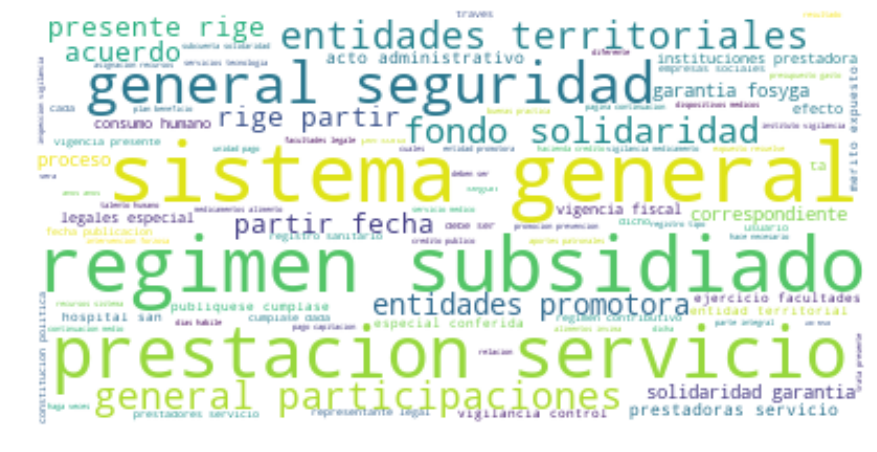

In [71]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(max_words=7000,stopwords=stopwords_esp, background_color="white").generate(todos_documentos_nopunct)
plt.rcParams["figure.figsize"] = [15.0, 15.0]
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('word_cloud.png')

# Analisis

# 1) Cobertura

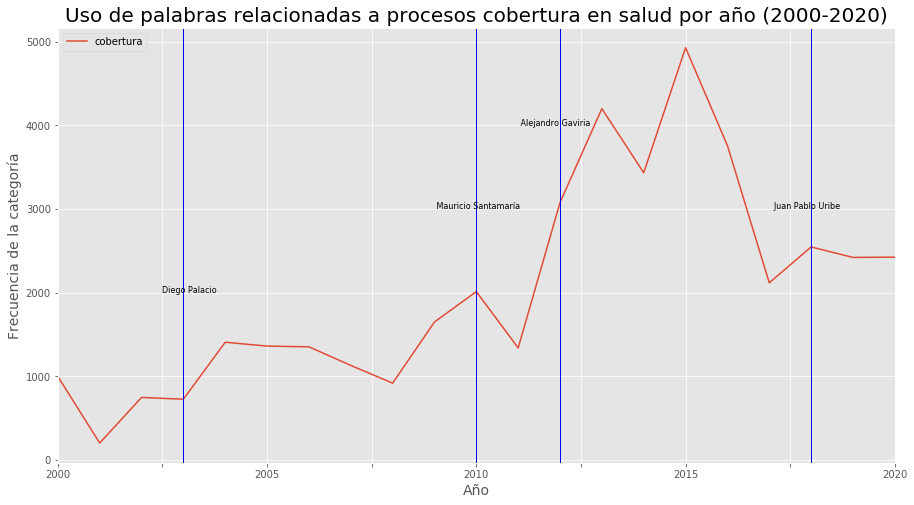

In [59]:
consolidado['cobertura'].plot(label='cobertura')

plt.text(2.5, 2000, "Diego Palacio",fontsize=8)
plt.text(9, 3000, " Mauricio Santamaría",fontsize=8)
plt.text(11, 4000, " Alejandro Gaviria",fontsize=8)
plt.text(17, 3000, "  Juan Pablo Uribe",fontsize=8)
plt.axvline(x=3, linewidth=1, color='b')
plt.axvline(x=10, linewidth=1, color='b')
plt.axvline(x=12, linewidth=1, color='b')
plt.axvline(x=18, linewidth=1, color='b')

plt.title("Uso de palabras relacionadas a procesos cobertura en salud por año (2000-2020)", fontdict={'fontsize': 20})
plt.ylabel("Frecuencia de la categoría", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.legend();
plt.savefig('cobertura_año.png')

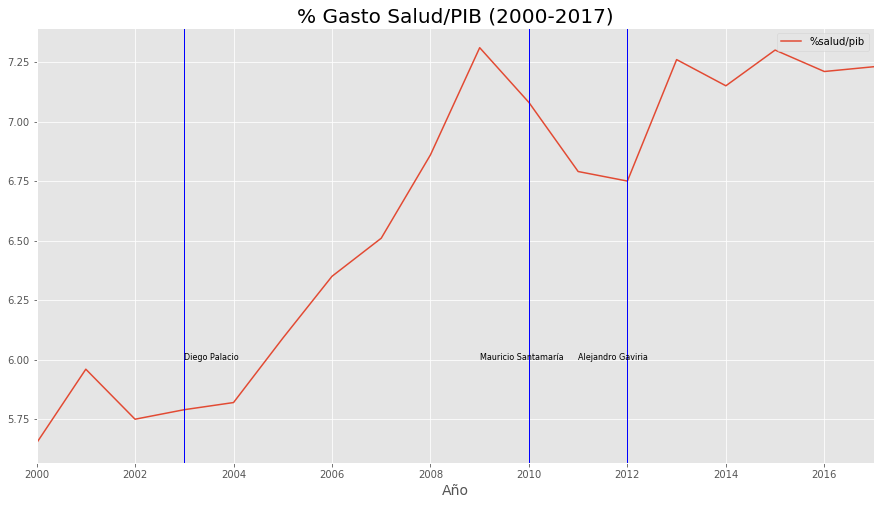

In [60]:
gasto['%salud/pib'].plot(label='%salud/pib')
plt.text(3, 6, "Diego Palacio",fontsize=8)
plt.text(9, 6, "Mauricio Santamaría",fontsize=8)
plt.text(11, 6, "Alejandro Gaviria",fontsize=8)
plt.axvline(x=3, linewidth=1, color='b')
plt.axvline(x=10, linewidth=1, color='b')
plt.axvline(x=12, linewidth=1, color='b')

plt.title("% Gasto Salud/PIB (2000-2017)", fontdict={'fontsize': 20})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.legend();
plt.savefig('gasto_salud_PIB.png')

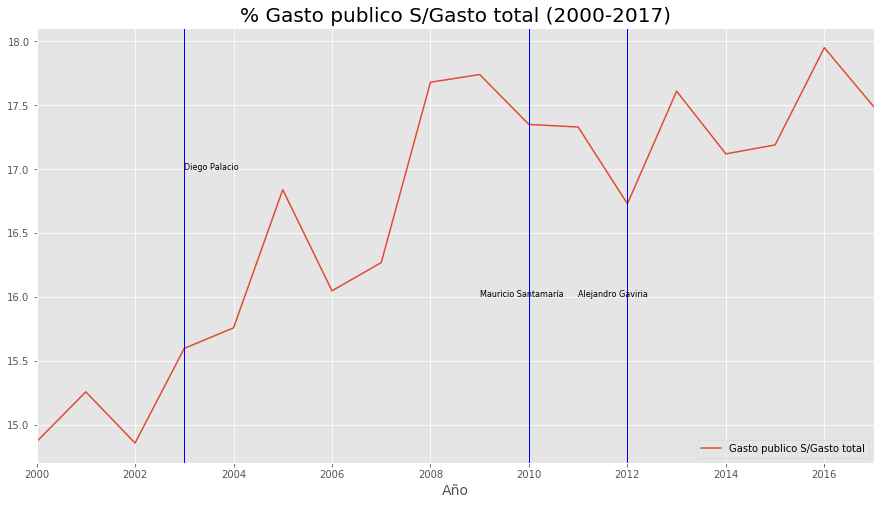

In [61]:

(gasto['Gasto publico S/gasto total']).plot(label='Gasto publico S/Gasto total')
plt.text(3, 17, "Diego Palacio",fontsize=8)
plt.text(9, 16, "Mauricio Santamaría",fontsize=8)
plt.text(11, 16, "Alejandro Gaviria",fontsize=8)
plt.axvline(x=3, linewidth=1, color='b')
plt.axvline(x=10, linewidth=1, color='b')
plt.axvline(x=12, linewidth=1, color='b')

plt.title("% Gasto publico S/Gasto total (2000-2017)", fontdict={'fontsize': 20})
plt.xlabel("Año", fontdict={'fontsize': 14});

plt.legend();
plt.savefig('gasto_publico_total.png')

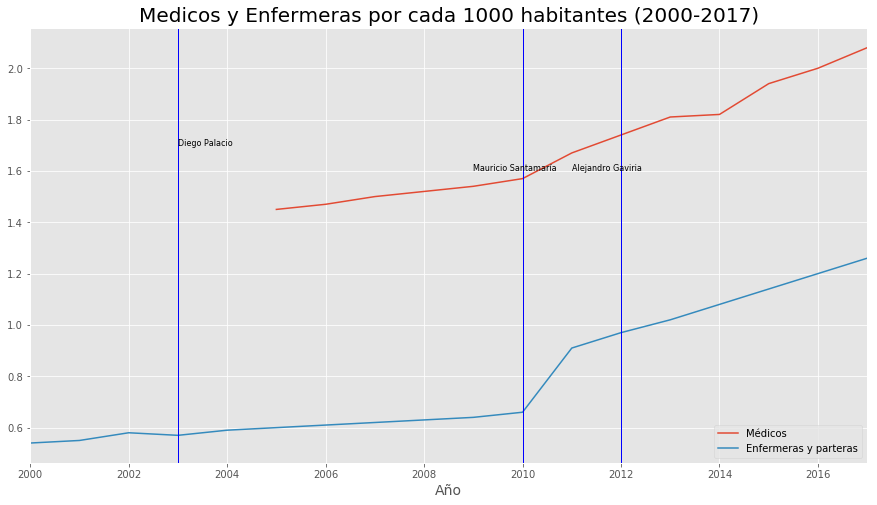

In [62]:
gasto['medico/1000'].plot(label='Médicos')
gasto['enfermeros/1000'].plot(label='Enfermeras y parteras')
plt.text(3, 1.7, "Diego Palacio",fontsize=8)
plt.text(9, 1.6, "Mauricio Santamaría",fontsize=8)
plt.text(11, 1.6, "Alejandro Gaviria",fontsize=8)
plt.axvline(x=3, linewidth=1, color='b')
plt.axvline(x=10, linewidth=1, color='b')
plt.axvline(x=12, linewidth=1, color='b')

plt.title("Medicos y Enfermeras por cada 1000 habitantes (2000-2017)", fontdict={'fontsize': 20})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.legend();
plt.savefig('medicos_enfermeras.png')

In [63]:
y_1=var_cobert['Año'].astype(str)
x_1=var_cobert['Contributivo']
x_2=var_cobert['Subsidiado']
x_3=var_cobert['R. Especiales y Excepción']

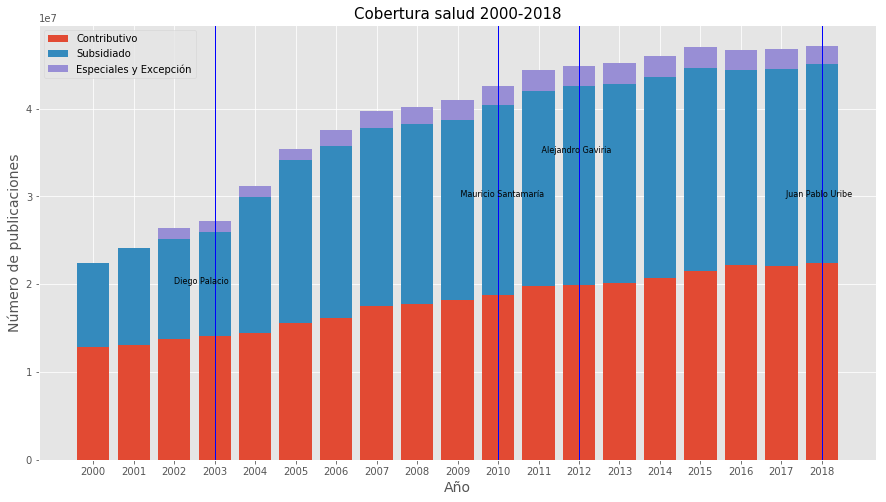

In [64]:
fig, ax = plt.subplots()
ax.bar(y_1, x_1, label='Contributivo')#
ax.bar(y_1, x_2, bottom=x_1,label='Subsidiado')
ax.bar(y_1, x_3, bottom=x_2+x_1,label='Especiales y Excepción')

ax.text(2, 20000000, "Diego Palacio",fontsize=8)
ax.text(9, 30000000, " Mauricio Santamaría",fontsize=8)
ax.text(11, 35000000, " Alejandro Gaviria",fontsize=8)
ax.text(17, 30000000, "  Juan Pablo Uribe",fontsize=8)
ax.axvline(x=3, linewidth=1, color='b')
ax.axvline(x=10, linewidth=1, color='b')
ax.axvline(x=12, linewidth=1, color='b')
ax.axvline(x=18, linewidth=1, color='b')
ax.set_title("Cobertura salud 2000-2018", fontdict={'fontsize': 15})
ax.set_ylabel("Número de publicaciones", fontdict={'fontsize': 14})
ax.set_xlabel("Año", fontdict={'fontsize': 14});


plt.legend()
plt.savefig('cobertura.png')

# 2) Epidemias

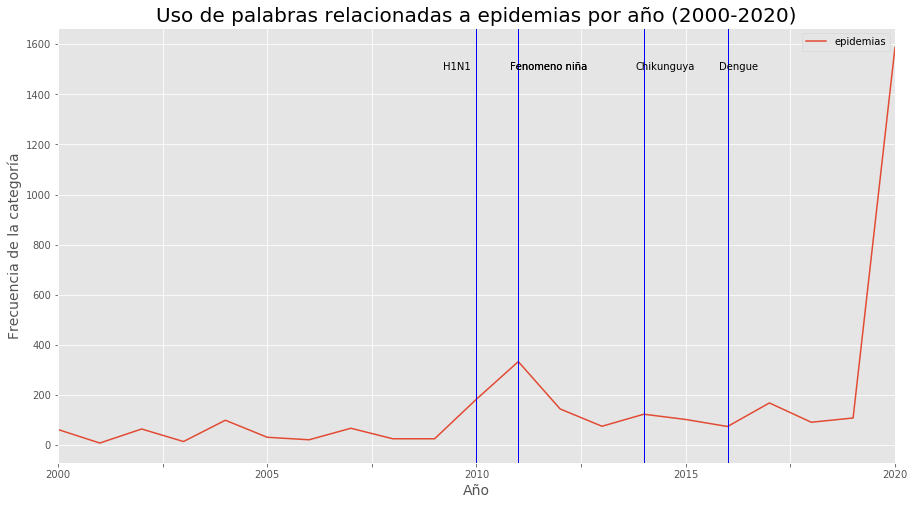

In [65]:
consolidado['epidemias'].plot(label='epidemias')

plt.text(9.2, 1500, "H1N1",fontsize=10)
plt.axvline(x=10, linewidth=1, color='b')
plt.text(10.8, 1500, "Fenomeno niña",fontsize=10)
plt.axvline(x=11, linewidth=1, color='b')
plt.text(10.8, 1500, "Fenomeno niña",fontsize=10)
plt.axvline(x=11, linewidth=1, color='b')
plt.text(13.8, 1500, "Chikunguya",fontsize=10)
plt.axvline(x=14, linewidth=1, color='b')
plt.text(15.8, 1500, "Dengue",fontsize=10)
plt.axvline(x=16, linewidth=1, color='b')
plt.title("Uso de palabras relacionadas a epidemias por año (2000-2020)", fontdict={'fontsize': 20})
plt.ylabel("Frecuencia de la categoría", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.legend();
plt.savefig('epidemias.png')

# 3) Intervenciones

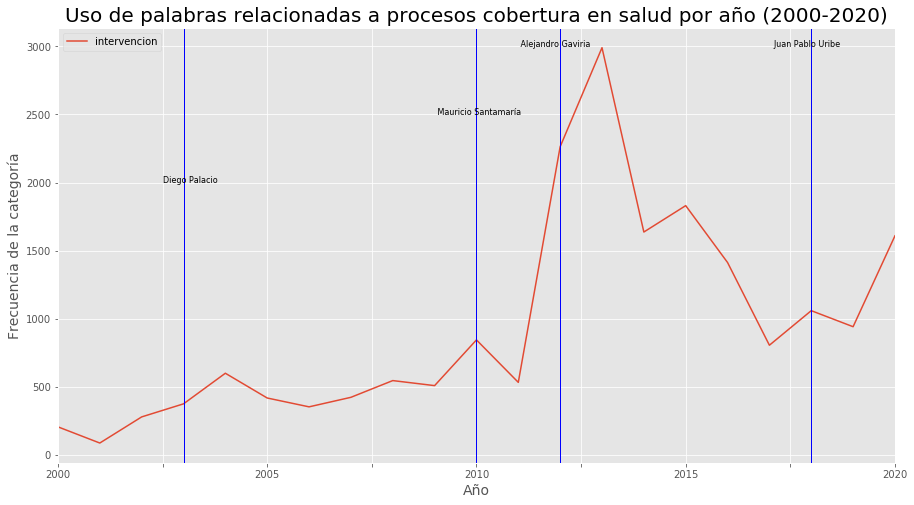

In [66]:
consolidado['intervencion'].plot(label='intervencion')

plt.text(2.5, 2000, "Diego Palacio",fontsize=8)
plt.text(9, 2500, " Mauricio Santamaría",fontsize=8)
plt.text(11, 3000, " Alejandro Gaviria",fontsize=8)
plt.text(17, 3000, "  Juan Pablo Uribe",fontsize=8)
plt.axvline(x=3, linewidth=1, color='b')
plt.axvline(x=10, linewidth=1, color='b')
plt.axvline(x=12, linewidth=1, color='b')
plt.axvline(x=18, linewidth=1, color='b')
plt.axvline(x=10, linewidth=1, color='b')
plt.title("Uso de palabras relacionadas a procesos cobertura en salud por año (2000-2020)", fontdict={'fontsize': 20})
plt.ylabel("Frecuencia de la categoría", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.legend();
plt.savefig('intervenciones.png')

# 4) Fraudes y Demandas

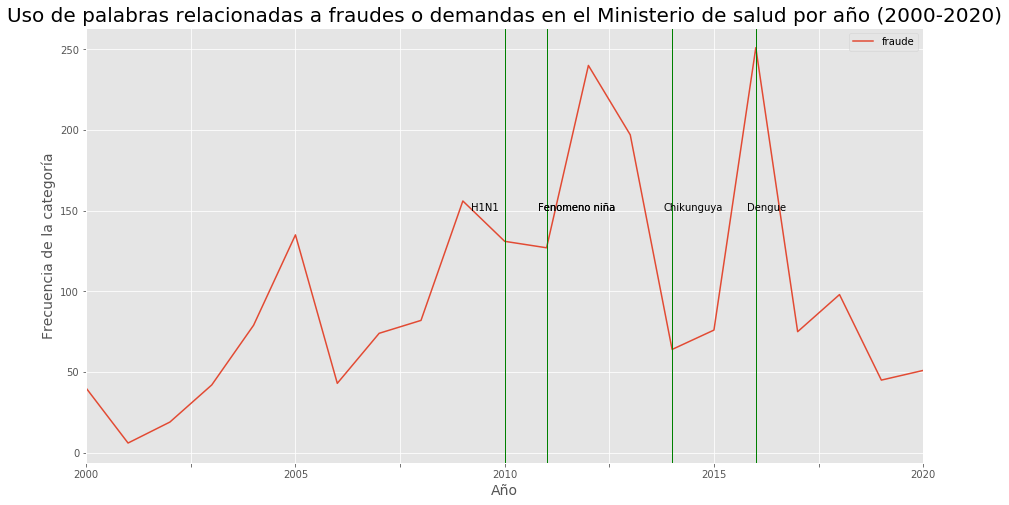

In [67]:
consolidado['fraude'].plot(label='fraude')
plt.text(9.2, 150, "H1N1",fontsize=10)
plt.axvline(x=10, linewidth=1, color='g')
plt.text(10.8, 150, "Fenomeno niña",fontsize=10)
plt.axvline(x=11, linewidth=1, color='g')
plt.text(10.8, 150, "Fenomeno niña",fontsize=10)
plt.axvline(x=11, linewidth=1, color='g')
plt.text(13.8, 150, "Chikunguya",fontsize=10)
plt.axvline(x=14, linewidth=1, color='g')
plt.text(15.8, 150, "Dengue",fontsize=10)
plt.axvline(x=16, linewidth=1, color='g')
plt.title("Uso de palabras relacionadas a fraudes o demandas en el Ministerio de salud por año (2000-2020)", fontdict={'fontsize': 20})
plt.ylabel("Frecuencia de la categoría", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.legend();
plt.savefig('fraude.png')

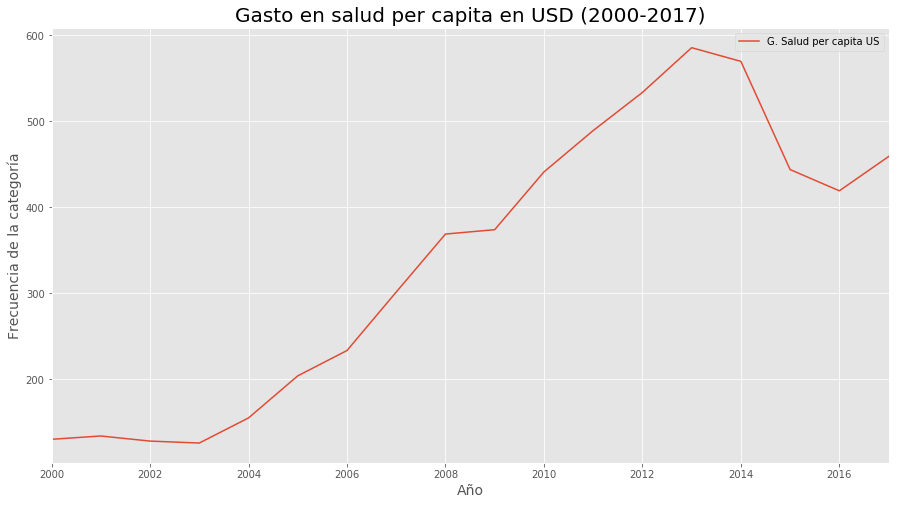

In [68]:
gasto['per capita US'].plot(label='G. Salud per capita US')
plt.title("Gasto en salud per capita en USD (2000-2017)", fontdict={'fontsize': 20})
plt.ylabel("Frecuencia de la categoría", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14});
plt.legend();
plt.savefig('salud_per_capita.png')